In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data_retail.csv', sep=';')
data.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
no                            100000 non-null int64
Row_Num                       100000 non-null int64
Customer_ID                   100000 non-null int64
Product                       100000 non-null object
First_Transaction             100000 non-null int64
Last_Transaction              100000 non-null int64
Average_Transaction_Amount    100000 non-null int64
Count_Transaction             100000 non-null int64
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [4]:
data['First_Transaction'] = pd.to_datetime(data['First_Transaction']/1000,  unit='s', origin='1970-01-01')

In [5]:
data['Last_Transaction'] = pd.to_datetime(data['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [6]:
data.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
no                            100000 non-null int64
Row_Num                       100000 non-null int64
Customer_ID                   100000 non-null int64
Product                       100000 non-null object
First_Transaction             100000 non-null datetime64[ns]
Last_Transaction              100000 non-null datetime64[ns]
Average_Transaction_Amount    100000 non-null int64
Count_Transaction             100000 non-null int64
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


In [8]:
print(max(data['Last_Transaction']))

2019-02-01 23:57:57.286000013


In [9]:
# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
data.loc[data['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
data.loc[data['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
no                            100000 non-null int64
Row_Num                       100000 non-null int64
Customer_ID                   100000 non-null int64
Product                       100000 non-null object
First_Transaction             100000 non-null datetime64[ns]
Last_Transaction              100000 non-null datetime64[ns]
Average_Transaction_Amount    100000 non-null int64
Count_Transaction             100000 non-null int64
is_churn                      100000 non-null bool
dtypes: bool(1), datetime64[ns](2), int64(5), object(1)
memory usage: 6.2+ MB


In [11]:
#hapus kolom yang tidak dibutuhkan
del data['no']
del data['Row_Num']

In [12]:
data.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False


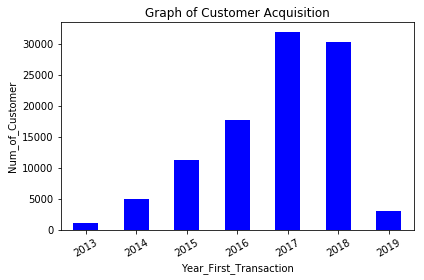

In [34]:
# Kolom tahun transaksi pertama
data['Year_First_Transaction'] = data['First_Transaction'].dt.year

# Kolom tahun transaksi terakhir
data['Year_Last_Transaction'] = data['Last_Transaction'].dt.year
data_year = data.groupby(['Year_First_Transaction'])['Customer_ID'].count()
data_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition', color='blue')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

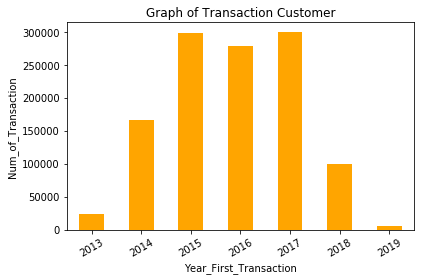

In [36]:
#Transaction by year
data_year = data.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
data_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer', color='orange')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

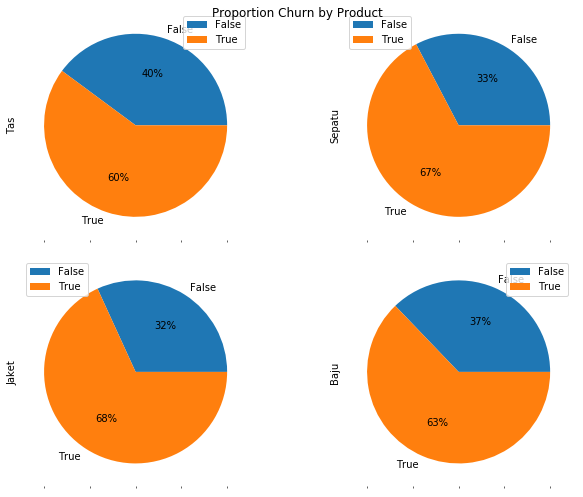

In [37]:
# Melakukan pivot data
data_piv = data.pivot_table(index='is_churn',
                            columns='Product',
                            values='Customer_ID',
                            aggfunc='count',
                            fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = data_piv.count().sort_values(ascending=False).head(5).index

# Plot pie chartnya
data_piv = data_piv.reindex(columns=plot_product)
data_piv.plot.pie(subplots=True,
                  figsize=(10, 7),
                  layout=(-1, 2),
                  autopct='%1.0f%%',
                  title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

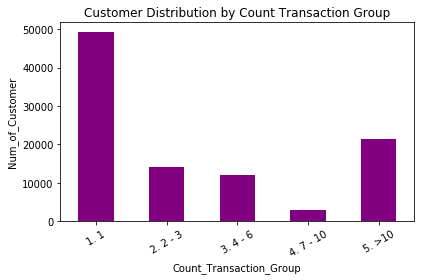

In [45]:
#Kategorisasi customer berdasarkan jumlah transaksi
def count_transaction_by_customer(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
        val ='3. 4 - 6'
    elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
        val ='4. 7 - 10'
    else:
        val ='5. >10'
    return val

#new column based on function above
data['Count_Transaction_Group'] = data.apply(count_transaction_by_customer, axis=1)
data_year = data.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
data_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group', color='purple')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

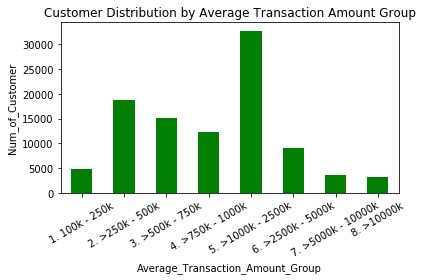

In [46]:
#Kategorisasi customer berdasarkan rata-rata avg spent
def avg_spent_customer(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
        val ='1. 100k - 250k'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250k - 500k'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500k - 750k'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750k - 1000k'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1000k - 2500k'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2500k - 5000k'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5000k - 10000k'
    else:
        val ='8. >10000k'
    return val

# Tambahkan kolom baru
data['Average_Transaction_Amount_Group'] = data.apply(avg_spent_customer, axis=1)
data_year = data.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
data_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group', color='green')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [47]:
#Feature and Target Selection
data['Year_Diff'] = data['Year_Last_Transaction'] - data['Year_First_Transaction']

#select feature
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

#features variable
X = data[feature_columns]

#target variable
y = data['is_churn']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [52]:
#Train and Predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [53]:
#Evaluate model with confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


In [56]:
##Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall : 0.66668
